# Project 2

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### CO2 from 800kyrs to present

In [228]:
co2df=pd.read_csv('correctedantarctica2015co2.csv', skiprows=14, usecols=[0,1,2,])


In [229]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04
...,...,...,...
1896,803925.28,202.92,2.06
1897,804009.87,207.50,0.92
1898,804522.67,204.86,1.64
1899,805132.44,202.23,0.69


In [230]:
co2df['year_co2'] = co2df['Gasage (yr BP)'].apply(lambda x: -x)

In [231]:
co2df

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv),year_co2
0,-51.03,368.02,0.06,51.03
1,-48.00,361.78,0.37,48.00
2,-46.28,359.65,0.10,46.28
3,-44.41,357.11,0.16,44.41
4,-43.08,353.95,0.04,43.08
...,...,...,...,...
1896,803925.28,202.92,2.06,-803925.28
1897,804009.87,207.50,0.92,-804009.87
1898,804522.67,204.86,1.64,-804522.67
1899,805132.44,202.23,0.69,-805132.44


[Text(0.5, 1.0, 'Corrected Composite CO2 800kyrs to Present')]

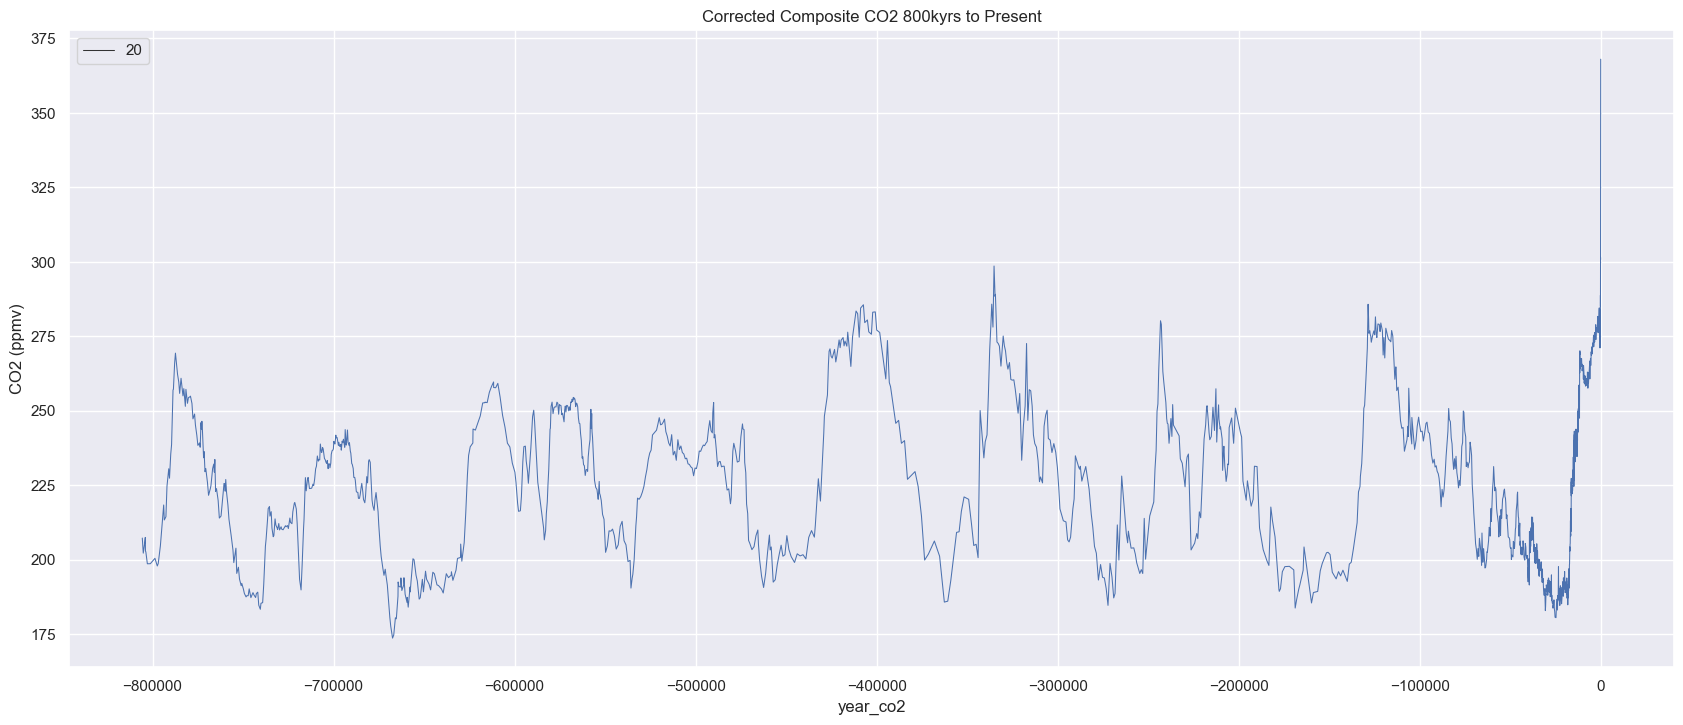

In [232]:
sns.lineplot(data=co2df, x='year_co2', y='CO2 (ppmv)',size=20).set(title='Corrected Composite CO2 800kyrs to Present')


In [233]:
tempdf=pd.read_csv('temperaturedata.csv')

In [234]:
tempdf

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


In [235]:
tempdf['year_temp'] = tempdf['EDC3béta'].apply(lambda x: -x)

In [236]:
tempdf

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,year_temp
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,50.00000
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,43.55977
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,37.44019
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,31.64156
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,24.55278
...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-816871.60000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-817693.60000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-818505.50000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-819303.10000


[Text(0.5, 1.0, 'Temperature 800kyrs to Present')]

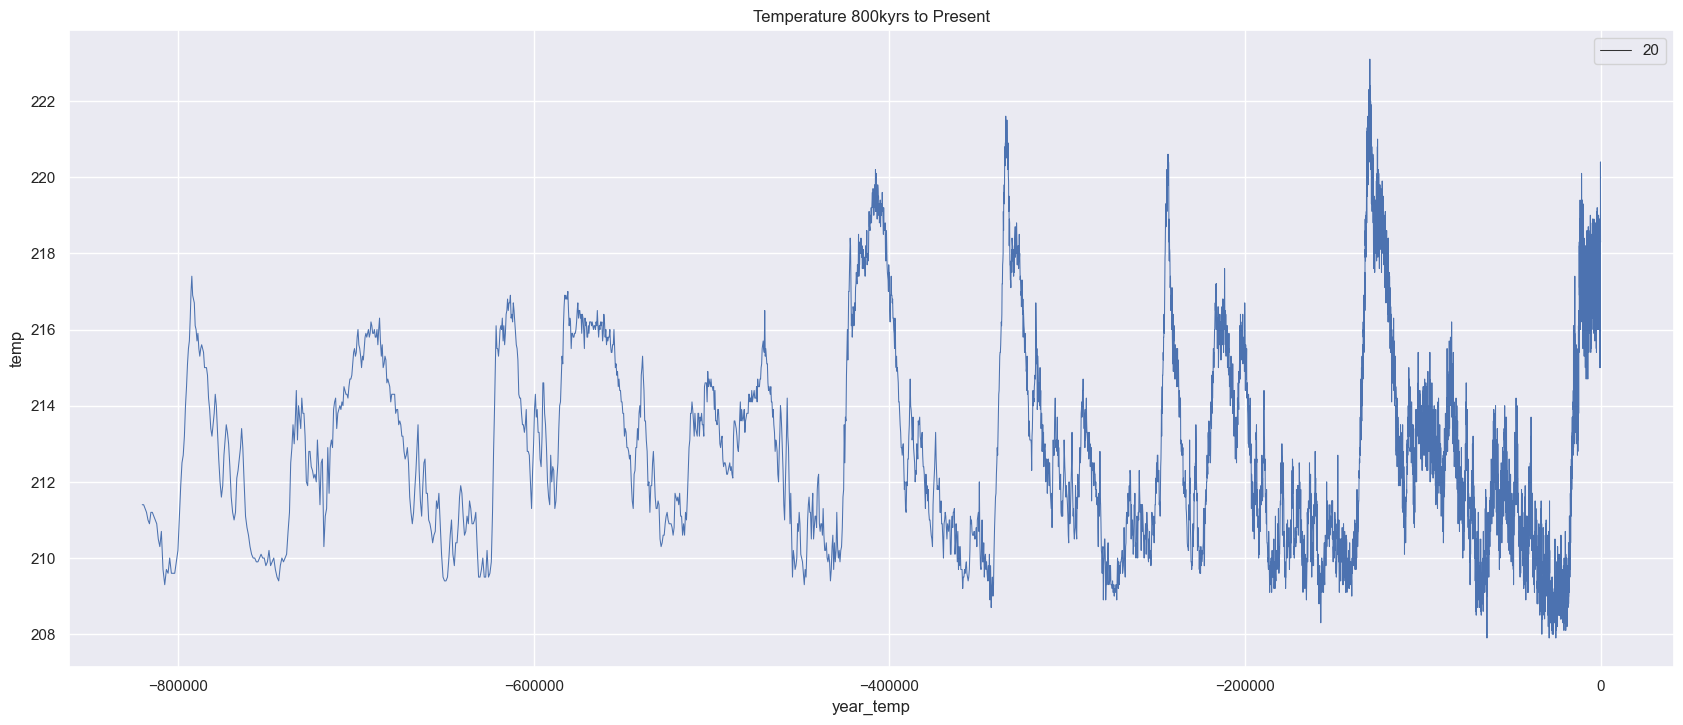

In [237]:
sns.lineplot(data=tempdf, x='year_temp', y='temp',size=20).set(title='Temperature 800kyrs to Present')


In [238]:
year_co2 = co2df[['year_co2','CO2 (ppmv)']]
year_temp = tempdf[['year_temp','temp']]

In [239]:
co2andtemp = pd.concat([year_co2, year_temp], axis =1)

In [240]:
co2andtemp

,year_co2,CO2 (ppmv),year_temp,temp
0,51.03,368.02,50.00000,218.3
1,48.00,361.78,43.55977,218.3
2,46.28,359.65,37.44019,218.3
3,44.41,357.11,31.64156,218.3
4,43.08,353.95,24.55278,218.3
...,...,...,...,...
5814,NaN,NaN,-816871.60000,211.0
5815,NaN,NaN,-817693.60000,211.2
5816,NaN,NaN,-818505.50000,211.3
5817,NaN,NaN,-819303.10000,211.4


In [248]:
co2andtemp.dtypes

year_co2      float64
CO2 (ppmv)    float64
year_temp     float64
temp          float64
dtype: object

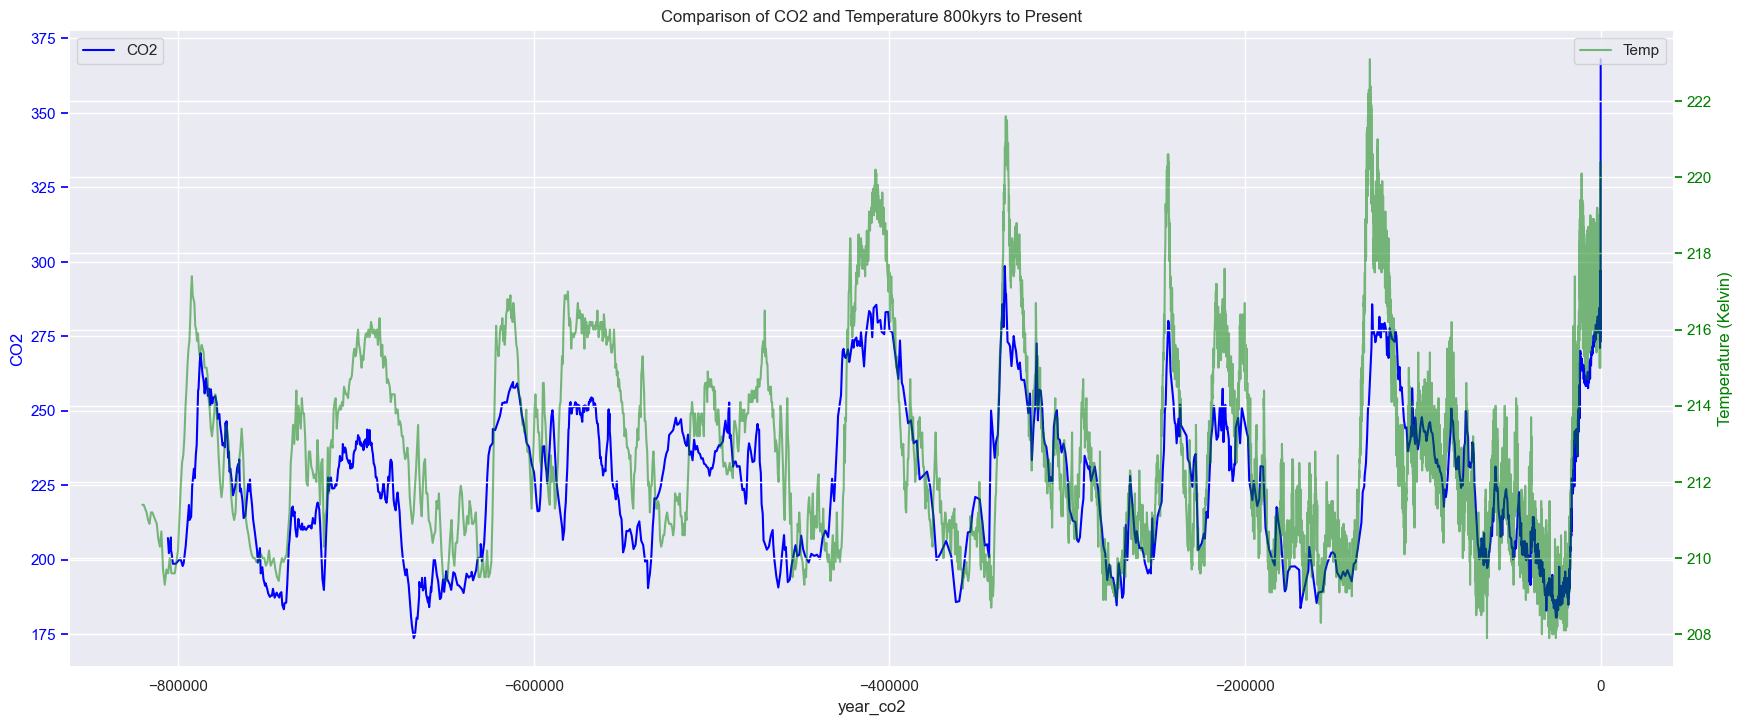

In [241]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2andtemp['year_co2'], co2andtemp['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(co2andtemp['year_temp'], co2andtemp['temp'], label='Temp', color='green',alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Comparison of CO2 and Temperature 800kyrs to Present')

# Display the plot
plt.show()

In [252]:
# Read the content of the file
with open('Methane CH4 800kyrs to present.txt', 'r') as file:
    lines = file.readlines()

# Process each line and add commas
lines_with_commas = []
for line in lines:
    columns = line.strip().split()  # Assuming columns are separated by spaces
    line_with_commas = ','.join(columns) + '\n'
    lines_with_commas.append(line_with_commas)

# Write the modified content back to the file
with open('Methane CH4 800kyrs to present.csv', 'w') as file:
    file.writelines(lines_with_commas)

In [253]:
ch4df=pd.read_csv('Methane CH4 800kyrs to present.csv')
ch4df

,Depth,GasAge,CH4mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [257]:
ch4df['GasAge'] = ch4df['GasAge'].apply(lambda x: -x)

[Text(0.5, 1.0, 'Methane Trend 800kyrs to Present')]

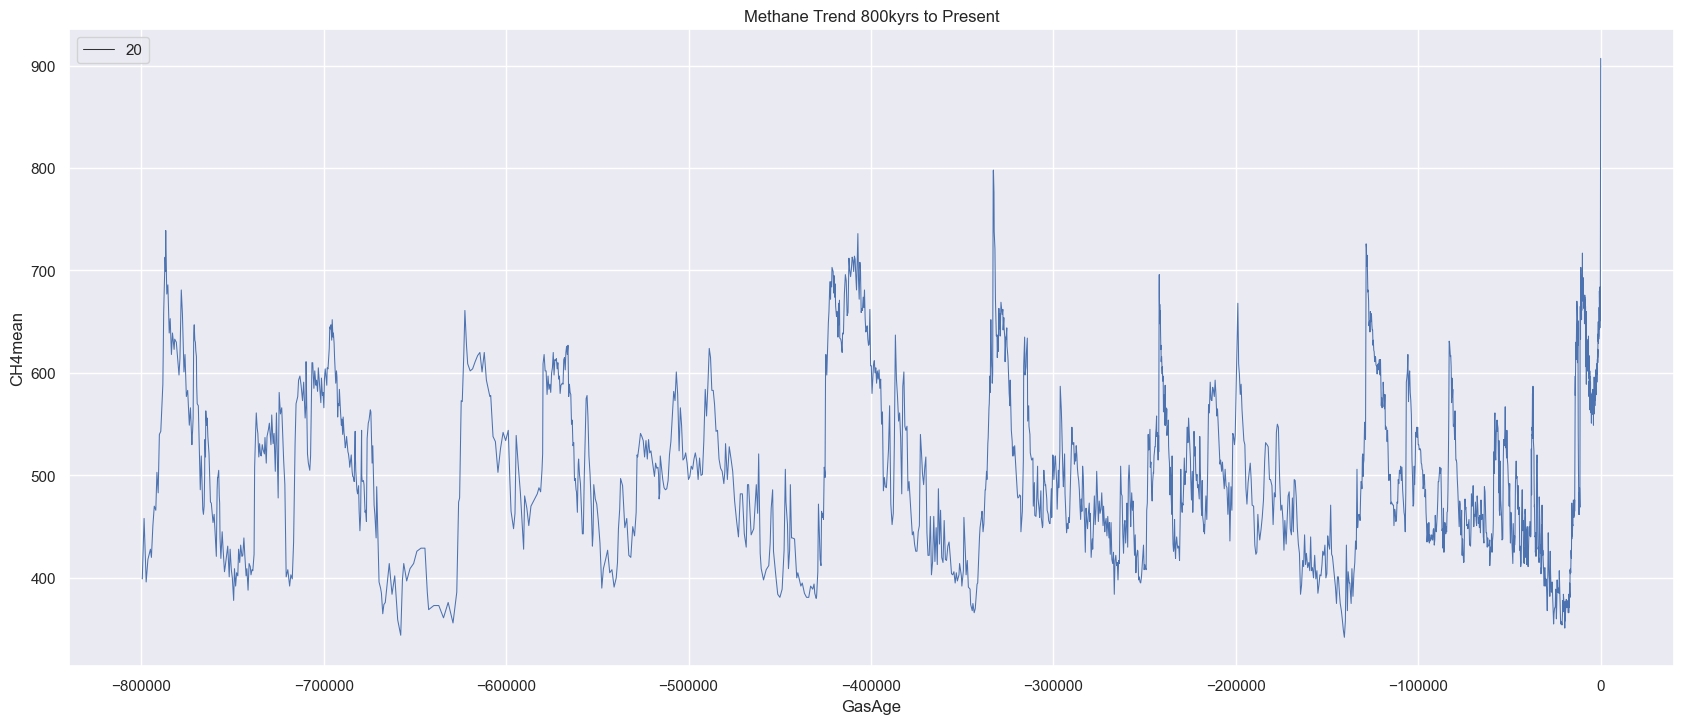

In [263]:
sns.lineplot(data=ch4df, x='GasAge', y='CH4mean',size=20).set(title='Methane Trend 800kyrs to Present')

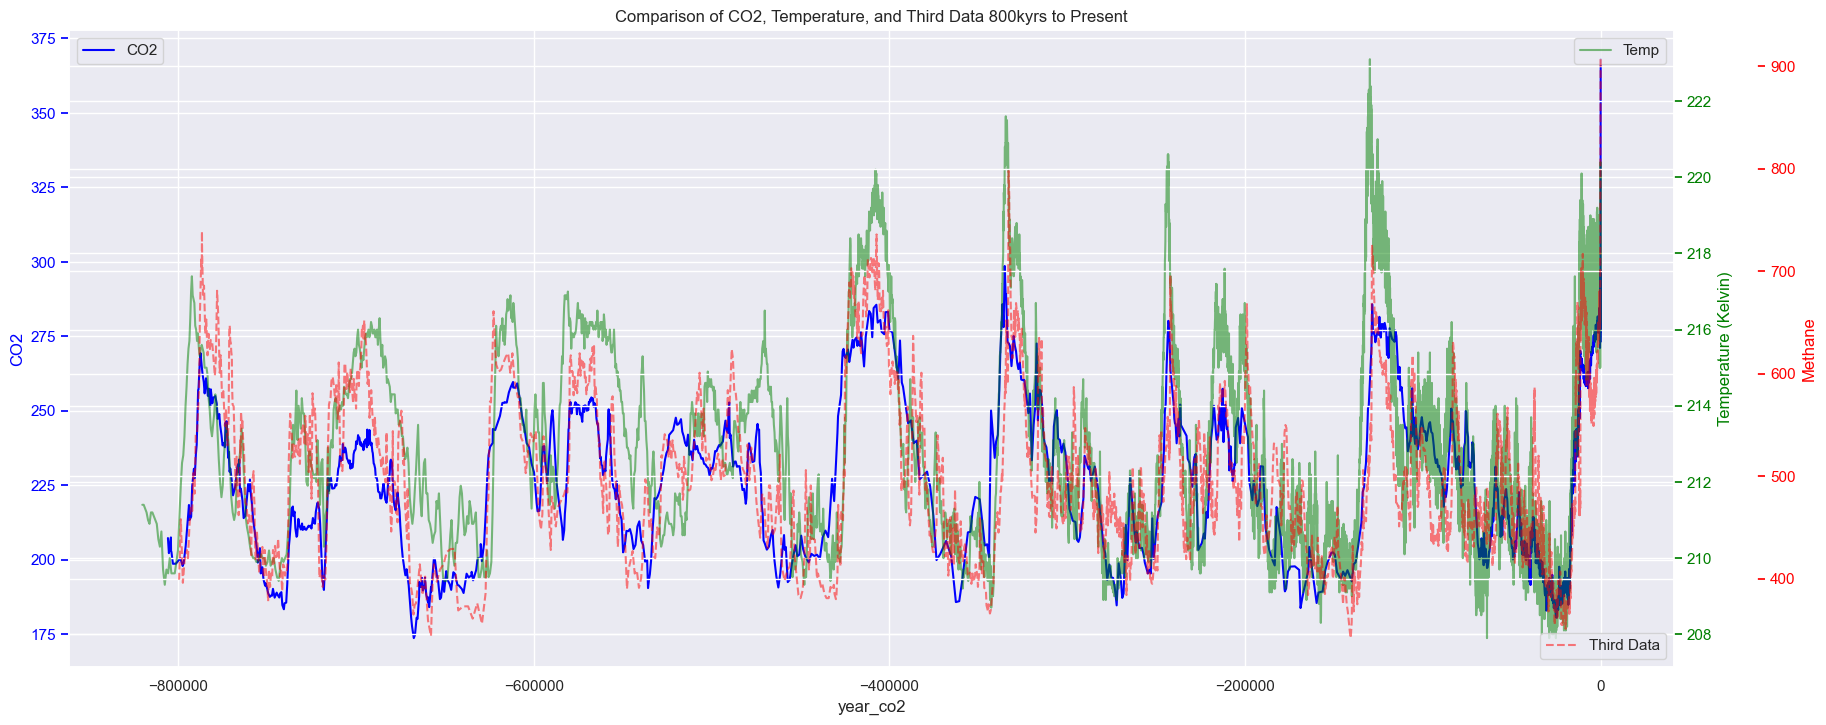

In [266]:
# Plotting
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(co2andtemp['year_co2'], co2andtemp['CO2 (ppmv)'], label='CO2', color='blue')
ax1.set_xlabel('year_co2')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second y-axis
ax2.plot(co2andtemp['year_temp'], co2andtemp['temp'], label='Temp', color='green', alpha=0.5)
ax2.set_ylabel('Temperature (Kelvin)', color='green')
ax2.tick_params('y', colors='green')

# Create a third y-axis
ax3 = ax1.twinx()

# Plot the third set of data on the third y-axis
ax3.plot(ch4df['GasAge'], ch4df['CH4mean'], label='Third Data', color='red', linestyle='dashed', alpha=0.5)
ax3.set_ylabel('Methane', color='red')
ax3.tick_params('y', colors='red')

# Move the spine of the third y-axis to the right to avoid overlapping
ax3.spines['right'].set_position(('outward', 60))

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# Add title
plt.title('Comparison of CO2, Temperature, and Third Data 800kyrs to Present')

# Display the plot
plt.show()

### Irish Data

In [ ]:
df = pd.read_csv("https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip")

In [ ]:
df

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


In [ ]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + 
                                        df['Month'].astype(str), format='%Y%m')

In [ ]:
df

,Year,Month,Median montly series,Date
0,1711,1,16.4,1711-01-01
1,1711,2,73.1,1711-02-01
2,1711,3,121.2,1711-03-01
3,1711,4,85.2,1711-04-01
4,1711,5,66.6,1711-05-01
...,...,...,...,...
3667,2016,8,79.1,2016-08-01
3668,2016,9,108.1,2016-09-01
3669,2016,10,51.8,2016-10-01
3670,2016,11,58.0,2016-11-01


<Axes: xlabel='Date', ylabel='Median montly series'>

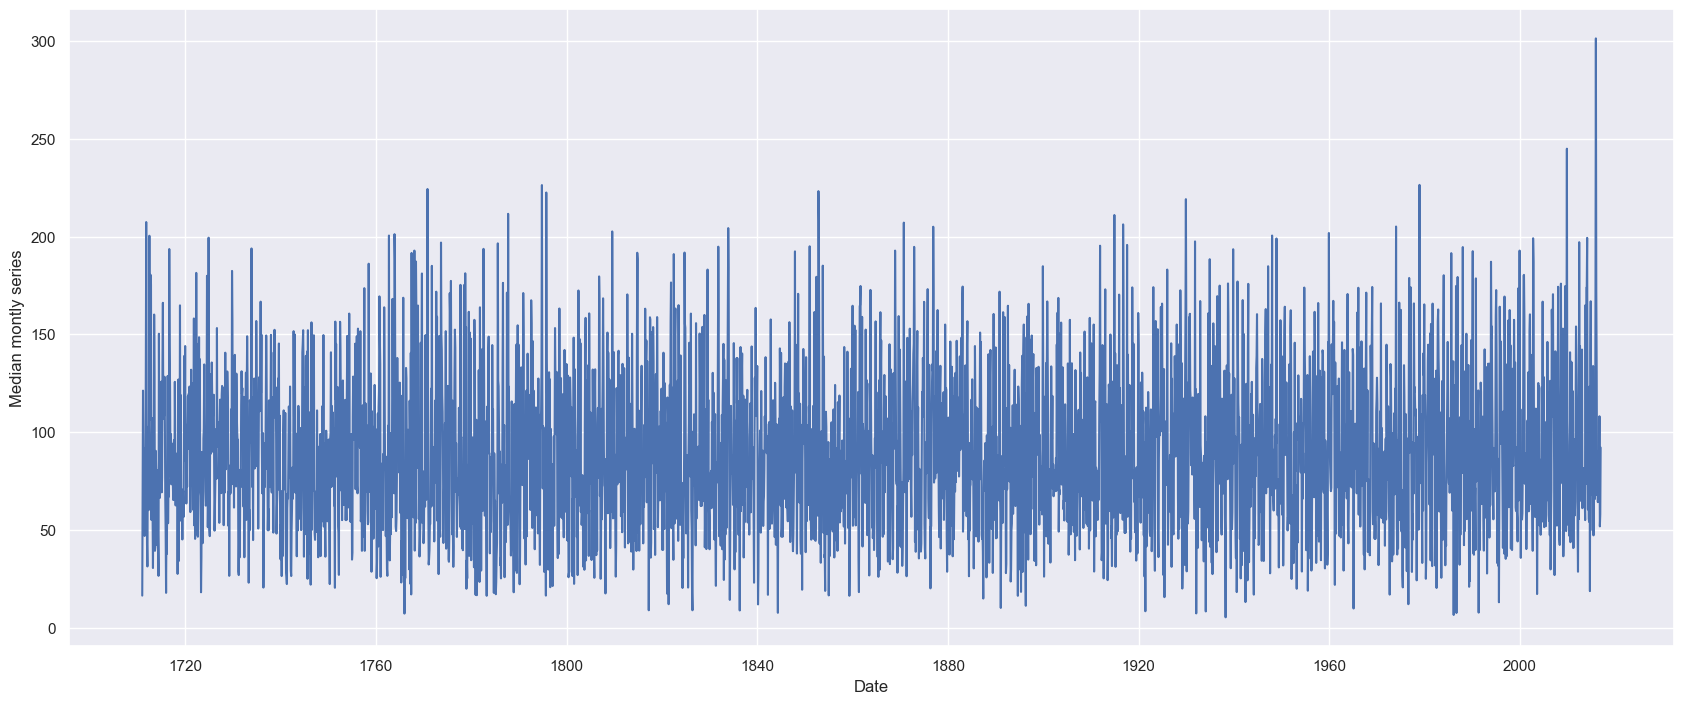

In [ ]:
sns.lineplot(data=df, x='Date', y='Median montly series', )

### References

[1] pandas.pydata.org. (n.d.). pandas.DataFrame.apply — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html. [Accessed 20 Dec. 2023].

[2] Marsja, E. (2023). Combine Year and Month Columns in Pandas. [online] Erik Marsja. Available at: https://www.marsja.se/combine-year-and-month-columns-in-pandas/ [Accessed 20 Dec. 2023].‌

[3] Stack Overflow. (n.d.). python - How to change the figure size of a seaborn axes or figure level plot. [online] Available at: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot. [Accessed 20 Dec. 2023].

[4] matplotlib.org. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html. [Accessed 20 Dec. 2023]

[5] Loulergue, L., A. Schilt, R. Spahni, V. Masson-Delmotte, T. Blunier, B. Lemieux, J.-M. Barnola, D. Raynaud, T.F. Stocker, and J. Chappellaz. 2008. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature, Vol. 453, pp. 383-386, 15 May 2008. doi:10.1038/nature06950. Noaa.gov. (2013). Available at: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt [Accessed 20 Dec. 2023].

‌